In [154]:
import pandas as pd
import numpy as np
%matplotlib inline   

In [155]:
data =pd.read_csv(r"C:/Users/user/Desktop/perf.csv")
data.head()

,Study.Hours,Sleep.Hours,Watch.Hours,Group.Hours,Status
0,6.0,6.0,3.0,2.0,Excellency
1,4.0,7.0,4.0,3.0,Good
2,7.0,6.5,2.0,2.0,Good
3,4.5,7.0,3.0,3.0,Fair
4,6.6,7.5,4.0,2.0,Fair


In [156]:
data.shape

(50, 5)

In [157]:
data.isnull().sum()

Study.Hours    0
Sleep.Hours    0
Watch.Hours    0
Group.Hours    0
Status         0
dtype: int64

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [159]:
label = le.fit_transform(data["Status"])
label

array([0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0,
       0, 0, 2, 2, 1, 0])

In [160]:
data["Status"].unique()

array(['Excellency', 'Good', 'Fair'], dtype=object)

In [161]:
y = label

In [162]:
X = data.iloc[:,0:4]
X.head()

,Study.Hours,Sleep.Hours,Watch.Hours,Group.Hours
0,6.0,6.0,3.0,2.0
1,4.0,7.0,4.0,3.0
2,7.0,6.5,2.0,2.0
3,4.5,7.0,3.0,3.0
4,6.6,7.5,4.0,2.0


In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
classifier = KNeighborsClassifier(n_neighbors = 11, p =2, metric = "euclidean")
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [168]:
model = classifier.fit(X_train,y_train)
model

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [169]:
import math
math.sqrt(len(y_test))

3.1622776601683795

In [170]:
y_pred = classifier.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2 1 0]
 [1 1 1]
 [2 0 2]]


In [173]:
from sklearn.metrics import f1_score

In [174]:
y_test

array([1, 0, 0, 2, 2, 1, 2, 0, 2, 1])

In [175]:
y_pred

array([0, 0, 1, 0, 2, 2, 2, 0, 0, 1])

In [183]:
#print(f1_score(y_test,y_pred))

In [184]:
from sklearn.metrics import accuracy_score 

In [185]:
print(accuracy_score(y_test,y_pred))

0.5


In [178]:
X.head()

,Study.Hours,Sleep.Hours,Watch.Hours,Group.Hours
0,6.0,6.0,3.0,2.0
1,4.0,7.0,4.0,3.0
2,7.0,6.5,2.0,2.0
3,4.5,7.0,3.0,3.0
4,6.6,7.5,4.0,2.0


In [179]:
train_accuracy = []
validation_accuracy = []
for depth in range (1,10):
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    validation_accuracy.append(model.score(X_test,y_test))

In [180]:
frame = pd.DataFrame({"max_depth":range(1,10),"train_acc":train_accuracy,"valid_acc":validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.525,0.4
1,2,0.525,0.4
2,3,0.525,0.4
3,4,0.525,0.4
4,5,0.525,0.4


In [181]:
import matplotlib.pyplot as plt

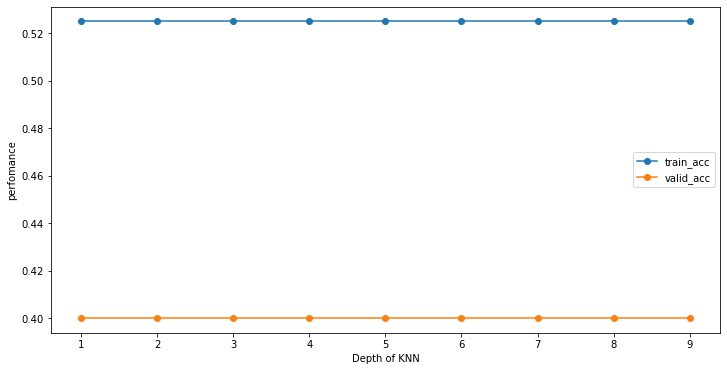

In [182]:
plt.figure(figsize = (12,6))
plt.plot(frame["max_depth"],frame["train_acc"], marker= "o")
plt.plot(frame["max_depth"],frame["valid_acc"], marker= "o")
plt.xlabel("Depth of KNN")
plt.ylabel("perfomance")
plt.legend(frame[["train_acc","valid_acc"]])